In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Bidirectional, SimpleRNN, Flatten
from tensorflow.keras.utils import to_categorical
import numpy as np

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [5]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [6]:
model = Sequential([
    Bidirectional(SimpleRNN(64, return_sequences=False), input_shape=(28, 28)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

c:\Users\KH.EN.P2MCA24015\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [7]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.1)


Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.7935 - loss: 0.6747 - val_accuracy: 0.9547 - val_loss: 0.1489
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9480 - loss: 0.1697 - val_accuracy: 0.9723 - val_loss: 0.0968
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9618 - loss: 0.1306 - val_accuracy: 0.9688 - val_loss: 0.0984
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9668 - loss: 0.1092 - val_accuracy: 0.9545 - val_loss: 0.1460
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9705 - loss: 0.0992 - val_accuracy: 0.9752 - val_loss: 0.0824


In [9]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9657 - loss: 0.1029
Test accuracy: 0.9702


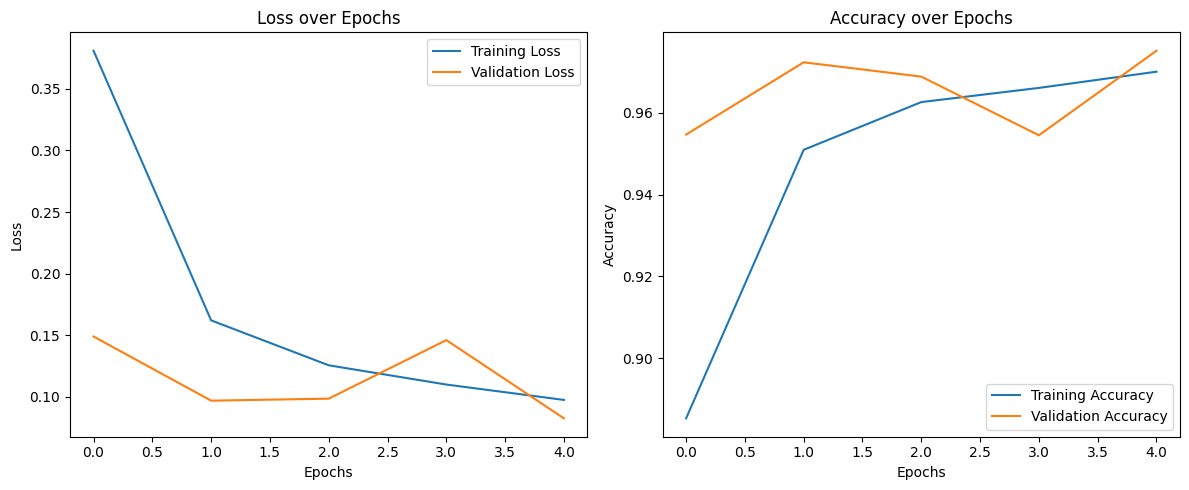

In [10]:
# Plot training and validation loss
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()